In [ ]:
# 使用最基础的tensorflow api
# 这些api 和 numpy 很多的api 很相似

In [1]:
import tensorflow as tf

In [2]:
# 可以把tensorflow 理解为一门新的语言，他有他自己的代码#
#规则
# 常量
# python 是没有常量的说法的 python的一切都可以变
# 常量一旦定义 值不可以改变
a = tf.constant(1)

In [3]:
a

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [4]:
a = tf.constant([[1,2,3],[4,5,6]])

In [5]:
a

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [6]:
# 取出常量的值
a.numpy()

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
# 可以像numpy 操作ndarry一样去使用tensor
# 切片 索引
a[0]

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [8]:
a[1]

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 5, 6])>

In [9]:
# 索引
a[1,1]

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [10]:
a[1,1].numpy()

5

In [15]:
a[:,1:]

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 4,  9],
       [25, 36]])>

In [11]:
# tensorflow 有一个特有的切片之法
# ... 表示逗号之前的所有的维度
# a 如果是三维 a[:,:,1:]
a[...,1:]

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [5, 6]])>

In [12]:
# 常量的操作
# 注意，没有修改常量 这样是返回一个新的tensorflow
a+1

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 4],
       [5, 6, 7]])>

In [13]:
# 用新的tensorflow 把a 覆盖掉了
a = tf.square(a)

In [14]:
a

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 1,  4,  9],
       [16, 25, 36]])>

In [16]:
# 如果对常量进行assign,那么就会报错，但是因为a是常量，没有assign 方法a
a.assign()

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

In [17]:
# 直接修改常量的内部值，也会报错
a[0,1] = 20

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [18]:
a[0,1]

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [19]:
a[0,1].numpy()

4

In [20]:
# tensor 和 ndarray 的转化
# 把tensor 变成了ndarray
a.numpy()

array([[ 1,  4,  9],
       [16, 25, 36]])

In [21]:
import numpy as np

In [22]:
b = np.random.randint(0,10,size=(3,4))

In [23]:
b

array([[2, 7, 0, 5],
       [9, 1, 9, 8],
       [2, 3, 3, 3]])

In [24]:
# 直接用ndarry 创建tensor即可
tf.constant(b)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[2, 7, 0, 5],
       [9, 1, 9, 8],
       [2, 3, 3, 3]])>

In [ ]:
# vector / matrix
# 只有一个数字  不带中括号 我们叫做标量  scalar

In [25]:
# a 就是标量
a = tf.constant(1)
a

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [26]:
a

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [27]:
# 不是标量
b = tf.constant([[1,2,3],[4,5,6]])

In [28]:
b

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [29]:
a.shape

TensorShape([])

In [30]:
b.shape

TensorShape([2, 3])

In [31]:
a = tf.constant('abcd')

In [32]:
print(a)

tf.Tensor(b'abcd', shape=(), dtype=string)


In [33]:
# 字符串的一些方法
# 计算字符串的长度
tf.strings.length(a)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [34]:
# utf8的编码长度
tf.strings.length(a,unit='UTF8_CHAR')

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [35]:
# 字符编码方式的转化
tf.strings.unicode_encode(tf.strings.unicode_decode(a,'UTF8'),'UTF-8')

<tf.Tensor: shape=(), dtype=string, numpy=b'abcd'>

In [36]:
# 字符串数组
t = tf.constant(['cafe','coffee','咖啡'])
t

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'cafe', b'coffee', b'\xe5\x92\x96\xe5\x95\xa1'], dtype=object)>

In [37]:
tf.strings.length(t,unit='UTF8_CHAR')

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 6, 2])>

In [38]:
tf.strings.unicode_decode(t,'UTF8')

<tf.RaggedTensor [[99, 97, 102, 101], [99, 111, 102, 102, 101, 101], [21654, 21857]]>

In [40]:
# ragged tensor 不整齐的tensor
r  = tf.ragged.constant([[11,12],[1,2,3],[],[0]])

In [41]:
tf.constant([[11,12],[1,2,3],[],[0]])

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [42]:
r[1]

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [43]:
r[1].numpy()

array([1, 2, 3])

In [44]:
# 左闭右开的切片
r[1:3]

<tf.RaggedTensor [[1, 2, 3], []]>

In [45]:
# ndarray 可以进行拼接
r

<tf.RaggedTensor [[11, 12], [1, 2, 3], [], [0]]>

In [46]:
r2 = tf.ragged.constant([[10,11],[4,5,6],[],[1]])

In [47]:
# axis = 1 对列进行操作，增加了列数
tf.concat([r,r2],axis=1)

<tf.RaggedTensor [[11, 12, 10, 11], [1, 2, 3, 4, 5, 6], [], [0, 1]]>

In [49]:
# axis = 0 对行进行操作，增加了行数
tf.concat([r,r2],axis=0)

<tf.RaggedTensor [[11, 12], [1, 2, 3], [], [0], [10, 11], [4, 5, 6], [], [1]]>

In [50]:
r3 = tf.ragged.constant([[1,2],[],[11]])

In [51]:
tf.concat([r,r3],axis=0)

<tf.RaggedTensor [[11, 12], [1, 2, 3], [], [0], [1, 2], [], [11]]>

In [52]:
r

<tf.RaggedTensor [[11, 12], [1, 2, 3], [], [0]]>

In [53]:
r3

<tf.RaggedTensor [[1, 2], [], [11]]>

In [54]:
tf.concat([r, r3], axis=1)

InvalidArgumentError: Input tensors have incompatible shapes.
Condition x == y did not hold.
First 1 elements of x:
[3]
First 1 elements of y:
[4]

In [55]:
import tensorflow as tf

In [56]:
# 把ragged constant转化成普通的tensor
r = tf.ragged.constant([[1, 2, 3], [1], [], [1, 2, 3, 4, 5]])

In [57]:
# 对不齐的地方补0, 可以通过default_value指定填充的值. shape可以指定转化之后的形状, 多余部分会被截断.
r.to_tensor(default_value=1, shape=(4, 3))

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 1, 1],
       [1, 1, 1],
       [1, 2, 3]])>

In [58]:
# 稀疏tensor, 稀疏矩阵, sparse tensor
# 矩阵中0的元素多于非0的元素, 非0元素的排列是没有规律.
# indices表示哪些位置上是非零0, 
# values指具体是哪些值
# dense_shape即sparsetensor的shape
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]], values=[4, 5, 6], dense_shape=[3, 4])
s

In [59]:
s.__str__()

'SparseTensor(indices=tf.Tensor(\n[[0 1]\n [1 0]\n [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([4 5 6], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))'

In [60]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([4 5 6], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [61]:
# 变成稠密矩阵
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[0, 4, 0, 0],
       [5, 0, 0, 0],
       [0, 0, 0, 6]])>

In [62]:
# 可以做乘法
s*2

In [63]:
# 不能做加法
s+1

TypeError: unsupported operand type(s) for +: 'SparseTensor' and 'int'

In [65]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([4 5 6], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [66]:
# matmul mtatrix multiply
# (3,4)_ (4,x)
ss = tf.constant([[10, 20],
            [30, 40],
            [50, 60],
            [70, 80]])
tf.sparse.sparse_dense_matmul(s,ss)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[120, 160],
       [ 50, 100],
       [420, 480]])>

In [67]:
# 定义sparse_tensor的时候, indices最好是有序的.
s2 = tf.SparseTensor(indices=[[0, 2], [0, 1], [2, 3]], values=[1, 2, 3], dense_shape=[3, 4])

In [68]:
print(s2)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1 2 3], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [69]:
# 转化成稠密矩阵
tf.sparse.to_dense(s2)

InvalidArgumentError: indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]

In [70]:
# 可以通过reorder对稀疏tensor重新排序.
s3 = tf.sparse.reorder(s2)

In [71]:
tf.sparse.to_dense(s3)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[0, 2, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 3]])>

# 变量

In [72]:
# 变量即内部的值可以变化. 比如神经网络中要学习的w,b就是变量. 
# tf.Variable来定义即可.
v = tf.Variable([[1, 2, 3], [4, 5, 6]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [73]:
# 返回的是ndarray
v.numpy()

array([[1, 2, 3],
       [4, 5, 6]])

In [74]:
# 返回的是变量的值创建的tensor
v.value()

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [75]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [77]:
v[0, 1] = 44

TypeError: 'ResourceVariable' object does not support item assignment

In [78]:
# 变量的赋值必须通过assign方法
v[0, 1].assign(44)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[ 1, 44,  3],
       [ 4,  5,  6]])>

In [79]:
v[1].assign([7, 8, 9])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[ 1, 44,  3],
       [ 7,  8,  9]])>

In [ ]:
# 变量赋值不能用=, 必须用assign

In [ ]:
# tf2.0只有常量和变量. 

# ensorflow数学运算

In [ ]:
# 有两种方式: 一种直接用python的算术运算符即可. 另一种使用tensorflow封装的数学运算函数.

In [80]:
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)

In [81]:
a+b

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [82]:
a - b

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [83]:
# tensorflow内部的运算函数
tf.add(a, b)
tf.subtract(a, b)
tf.multiply(a, b)
tf.divide(a, b)

<tf.Tensor: shape=(), dtype=float64, numpy=0.6666666666666666>

In [84]:
n = np.random.randint(0, 10, size=(3, 4))
n

array([[2, 9, 5, 4],
       [1, 3, 5, 9],
       [6, 4, 2, 9]])

In [85]:
n.sum(axis=0)

array([ 9, 16, 12, 22])

In [86]:
# tensorflow的聚合运算, 都会reduce
# tensorflow中的聚合和numpy是一样, 不指定axis, 会把所有的维度聚掉. 
tf.reduce_sum(n)

<tf.Tensor: shape=(), dtype=int32, numpy=59>

In [87]:
n.sum(axis=1)

array([20, 18, 21])

In [88]:
tf.reduce_sum(n, axis=0)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 16, 12, 22])>

In [89]:
tf.reduce_sum(n,axis=1).numpy()

array([20, 18, 21])

In [90]:
# 矩阵的乘法.
x = np.random.randint(0, 10, size=(3, 5))
y = np.random.randint(0, 10, size=(5, 4))
# matrix multiply 矩阵乘法, 即点乘
tf.matmul(x, y)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 97,  72, 133,  31],
       [ 53,  47,  40,  12],
       [136,  76, 161,  71]])>

In [91]:
# 矩阵乘法的简写
x @ y

array([[ 97,  72, 133,  31],
       [ 53,  47,  40,  12],
       [136,  76, 161,  71]])

In [92]:
x.dot(y)

array([[ 97,  72, 133,  31],
       [ 53,  47,  40,  12],
       [136,  76, 161,  71]])

In [93]:
# @符号表示矩阵的点乘, 在tensorflow中和numpy中是通用.
tf.constant(x) @ tf.constant(y)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 97,  72, 133,  31],
       [ 53,  47,  40,  12],
       [136,  76, 161,  71]])>

In [ ]:
# 没有tf.dot
tf.dot()

In [94]:
x = np.random.randint(0, 10, size=(3, 5))
y = np.random.randint(0, 10, size=(5, 4))
# multiply是普通乘法, 矩阵和矩阵之间是对应位置的元素相乘. 这样的话就要求相乘的矩阵的shape必须一致.
tf.multiply(x, y)

InvalidArgumentError: Incompatible shapes: [3,5] vs. [5,4] [Op:Mul]

# 使用TensorFlow实现线性回归

In [ ]:
# 实现一个算法从以下三步入手:
1. 找到算法的预测函数. y = wx + b
2. 找到算法的损失函数. 最小二乘法  
3. 使用梯度下降求损失最小的时候的参数

In [95]:
import matplotlib.pyplot as plt

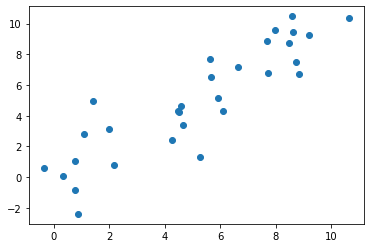

In [97]:
# 加噪声
x = np.linspace(0, 10, 30) + np.random.randn(30)
y = np.linspace(0, 10, 30) + np.random.randn(30)
plt.scatter(x, y)

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
linear = LinearRegression()
linear.fit(x.reshape(-1, 1), y)

LinearRegression()

In [100]:
linear.coef_

array([1.00050069])

In [101]:
linear.intercept_

-0.1332743000327108

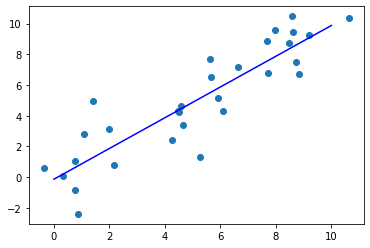

In [102]:
plt.scatter(x, y)
x_test = np.linspace(0, 10, 30)
y_test = linear.coef_[0] * x_test + linear.intercept_
plt.plot(x_test, y_test, c='b')

In [103]:
# 把W, B定义为变量.
W = tf.Variable(np.random.randn() * 0.02)
B = tf.Variable(0.)

In [104]:
# 定义预测函数
def linear_regression(x):
    return W * x + B

In [105]:
# 定义损失函数
# 最小二乘法
def mean_square_loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [106]:
# 优化器, 即梯度下降算法
optimizer = tf.optimizers.SGD()

In [107]:
# 定义优化过程
def run_optimization():
    # 需要把计算过程放在梯度带(GradientTape)中执行, 可以实现自动微分.
    with tf.GradientTape() as g:
        pred = linear_regression(x)
        loss = mean_square_loss(pred, y)
        
    # 计算梯度
    gradients = g.gradient(loss, [W, B])
    
    # 更新W,B
    optimizer.apply_gradients(zip(gradients, [W, B]))
    

In [108]:
# 训练
for step in range(5000):
    # 调用一次run_optimization就更新一次W,B
    run_optimization()
    # 展示一下训练过程
    # 每100次训练, 输出一下过程
    if step % 100 == 0:
        pred = linear_regression(x)
        loss = mean_square_loss(pred, y)
        print(f'step:{step + 1}, loss: {loss}, W: {W.numpy()}, B:{B.numpy()}')

step:1, loss: 4.964095592498779, W: 0.7105724215507507, B:0.09673021733760834
step:101, loss: 2.586766481399536, W: 0.9782249927520752, B:0.022029543295502663
step:201, loss: 2.5824074745178223, W: 0.9875006675720215, B:-0.042639538645744324
step:301, loss: 2.5809226036071777, W: 0.9929139018058777, B:-0.08038017898797989
step:401, loss: 2.5804171562194824, W: 0.9960730671882629, B:-0.10240547358989716
step:501, loss: 2.580245018005371, W: 0.9979167580604553, B:-0.11525935679674149
step:601, loss: 2.580186367034912, W: 0.9989927411079407, B:-0.1227608472108841
step:701, loss: 2.5801663398742676, W: 0.9996206760406494, B:-0.12713870406150818
step:801, loss: 2.5801594257354736, W: 0.9999870657920837, B:-0.1296936273574829
step:901, loss: 2.5801570415496826, W: 1.0002009868621826, B:-0.1311846524477005
step:1001, loss: 2.5801565647125244, W: 1.0003257989883423, B:-0.13205476105213165
step:1101, loss: 2.580155849456787, W: 1.0003986358642578, B:-0.13256247341632843
step:1201, loss: 2.58015

In [109]:
linear.coef_

array([1.00050069])

In [110]:
linear.intercept_

-0.1332743000327108